In [1]:
!pip install pixiedust

In [30]:
import pixiedust

Pixiedust database opened successfully


In [31]:
import numpy as np
import pandas as pd

In [32]:
file = r'./data/LearningStyles.csv'

In [33]:
df = pd.read_csv(file, sep=',', encoding='gbk')

In [34]:
print(df)

      GRADO GRUPO  \
0         1     G   
1         1     D   
2         1     A   
3         1     B   
4         1     F   
...     ...   ...   
1017      3     K   
1018      3     K   
1019      3     K   
1020      3     J   
1021      3     L   

      Me ayuda trazar o escribir a mano las palabras cuando tengo que aprenderlas de\nmemoria.\n1 = Nunca\n2 = Raramente\n3 = Ocasionalmente\n4 = Usualmente\n5 = Siempre  \
0                                                     1                                                                                                                     
1                                                     5                                                                                                                     
2                                                     3                                                                                                                     
3                                                     1

In [35]:
display(df)

In [ ]:
display(df)

In [ ]:
display(df)

In [ ]:
display(df)

In [ ]:
display(df)

## Fb Groups and Page Data Enriched

In [5]:
!pip -q install --user --no-warn-script-location ibm-watson==4.7.1

In [6]:
!pip -q install --user beautifulsoup4==4.9.2

In [5]:
import pandas as pd
import json

with open('./data/dataSchool.json', 'r+', encoding="utf8") as f:
    data = json.load(f)

df = pd.json_normalize(data)
print(df)
df.to_csv('./data/dataSchool.csv',index=False)

                                                data  \
0  [{'id': '109037004060247_180497573580856', 'me...   

                               paging.cursors.before  \
0  QVFIUlJId0c0dTdsaEliZAHUxcVVrTlFKTklXVVpjRG1ua...   

                                paging.cursors.after  \
0  QVFIUlFFdWNtbU1aSHBqMUo1dW9zc0tUbVBmazhTc0tzUn...   

                                         paging.next  
0  https://graph.facebook.com/v8.0/10903700406024...  


In [6]:
import types
import pandas as pd
df_data_1 = pd.read_csv('./data/dataSchoolPage.csv')
df_data_1.head()

,data__id,data__message,data__shares__count,data__comments__data__id,data__comments__data__message,data__comments__data__like_count,data__comments__paging__cursors__before,data__comments__paging__cursors__after,paging__cursors__before,paging__cursors__after,...,data__comments__data__reactions__data__id,data__comments__data__reactions__data__name,data__comments__data__reactions__data__type,data__comments__data__reactions__paging__cursors__before,data__comments__data__reactions__paging__cursors__after,data__reactions__data__id,data__reactions__data__name,data__reactions__paging__cursors__before,data__reactions__paging__cursors__after,data__reactions__paging__next
0,109037004060247_180497573580856,IMPORTANTE.,27.0,180497573580856_180498203580793,PARA ALUMNOS.Secundaria Técnica 16 - Taller es...,0.0,WTI5dGJXVnVkRjlqZAFhKemIzSTZANVGd3TkRrNE1qQXpO...,WTI5dGJXVnVkRjlqZAFhKemIzSTZANVGd3TmpJNE1qWXdN...,Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5SXhNRG...,Q2c4U1pXNTBYM0YxWlhKNVgzTjBiM0o1WDJsa0R5SXhNRG...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,180497573580856_180498533580760,PARA PADRES DE FAMILIA.SECUNDARIA TÉCNICA 16 -...,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,180497573580856_180500450247235,Maria Rayas,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,180497573580856_180501820247098,Adri Ortega,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,180497573580856_180505850246695,Renata Huerta,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import json
import sys

from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, EmotionOptions, SentimentOptions

import operator
from functools import reduce
from io import StringIO
import numpy as np
from bs4 import BeautifulSoup as bs
from operator import itemgetter
from os.path import join, dirname
import pandas as pd
import numpy as np
import requests

# Suppress some pandas warnings
pd.options.mode.chained_assignment = None  # default='warn'
# Suppress SSL warnings
requests.packages.urllib3.disable_warnings()

In [2]:
#@hidden_cell

# Watson Natural Language Understanding (NLU)
NATURAL_LANGUAGE_UNDERSTANDING_API_KEY = '7MGwCGJ9qF4zahtrQl3eN6vn2RxBqiQ5YhWZqi4Xee3E'
NATURAL_LANGUAGE_UNDERSTANDING_URL = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/68ba0285-8044-46d0-a3cb-6a9b334e1879'

# Watson Visual Recognition
VISUAL_RECOGNITION_API_KEY = 'pfY63VzhP5NqpR9-5AZMFxmeajkJdjxL9mBDNre_cOh-'
VISUAL_RECOGNITION_URL = 'https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/4f4bc535-5e22-4923-816a-f4c1afb058d1'

In [3]:
# Create the Watson clients

nlu_auth = IAMAuthenticator(NATURAL_LANGUAGE_UNDERSTANDING_API_KEY)
nlu = NaturalLanguageUnderstandingV1(version='2020-08-01',
                                     authenticator=nlu_auth)
nlu.set_service_url(NATURAL_LANGUAGE_UNDERSTANDING_URL)

visual_recognition = False  # Making visrec optional.
if VISUAL_RECOGNITION_API_KEY and VISUAL_RECOGNITION_URL:
    vr_auth = IAMAuthenticator(VISUAL_RECOGNITION_API_KEY)
    visual_recognition = VisualRecognitionV3(version='2020-08-01',
                                             authenticator=vr_auth)
    visual_recognition.set_service_url(VISUAL_RECOGNITION_URL)
else:
    print("Skipping Visual Recognition")

In [7]:
# Make sure this uses the variable above. The number will vary in the inserted code.
try:
    df = df_data_1
except NameError as e:
    print('Error: Setup is incorrect or incomplete.\n')
    raise

In [8]:
df.rename(columns={'data__message': 'Text'}, inplace=True)

In [9]:
# Drop the rows that have no value for the text.
df.dropna(subset=['Text'], inplace=True)

In [10]:
df_http = df["Text"].str.partition("http")
df_www = df["Text"].str.partition("www")

# Combine delimiters with actual links
df_http["Link"] = df_http[1].map(str) + df_http[2]
df_www["Link1"] = df_www[1].map(str) + df_www[2]

# Include only Link columns
df_http.drop(df_http.columns[0:3], axis=1, inplace = True)
df_www.drop(df_www.columns[0:3], axis=1, inplace = True)

# Merge http and www DataFrames
dfmerge = pd.concat([df_http, df_www], axis=1)

# The following steps will allow you to merge data columns from the left to the right
dfmerge = dfmerge.apply(lambda x: x.str.strip()).replace('', np.nan)

# Use fillna to fill any blanks with the Link1 column
dfmerge["Link"].fillna(dfmerge["Link1"], inplace = True)

# Delete Link1 (www column)
dfmerge.drop("Link1", axis=1, inplace = True)

# Combine Link data frame
df = pd.concat([dfmerge,df], axis = 1)

# Make sure text column is a string
df["Text"] = df["Text"].astype("str")

# Strip links from Text column
df['Text'] = df['Text'].apply(lambda x: x.split('http')[0])
df['Text'] = df['Text'].apply(lambda x: x.split('www')[0])

In [11]:
# Changing links from objects to strings
for link in df.Link:
    df.Link.to_string()

piclinks = []
description = []
for url in df["Link"]:
    if pd.isnull(url):
        piclinks.append("")
        description.append("")
        continue
        
    try:
        # Skiping certificate check with verify=False.
        page3 = requests.get(url, verify=False)
        if page3.status_code != requests.codes.ok:
            piclinks.append("")
            description.append("")
            continue
    except Exception as e:
        print("Skipping url %s: %s" % (url, e))
        piclinks.append("")
        description.append("")
        continue
        
    soup3 = bs(page3.text,"lxml")
    
    pic = soup3.find('meta', property ="og:image")
    if pic:
        piclinks.append(pic["content"])
    else: 
        piclinks.append("")
    
    content = None
    desc = soup3.find(attrs={'name':'Description'})
    if desc:
        content = desc['content']
    if not content or content == 'null':
        # Try again with lowercase description
        desc = soup3.find(attrs={'name':'description'})
        if desc:
            content = desc['content']
    if not content or content == 'null':
        description.append("")
    else:
        description.append(content)
            
# Saving thumbnail descriptions to df in a column titled 'Thumbnails'
df["Thumbnails"] = description
# Saving image links to df in a column titled 'Image'
df["Image"] = piclinks

In [12]:
shortlink = df["Link"]
extendedlink = []

for link in shortlink:
    if isinstance(link, float):  # Float is not a URL, probably NaN.
        extendedlink.append('')
    else:
        try:
            extended_link = requests.Session().head(link, allow_redirects=True).url
            extendedlink.append(extended_link)
        except Exception as e:
            print("Skipping link %s: %s" % (link, e))
            extendedlink.append('')

df["Extended Links"] = extendedlink

In [13]:
# Define the list of features to get enrichment values for entities, keywords, emotion and sentiment
features = Features(entities=EntitiesOptions(), keywords=KeywordsOptions(), emotion=EmotionOptions(), sentiment=SentimentOptions())

overallSentimentScore = []
overallSentimentType = []
highestEmotion = []
highestEmotionScore = []
kywords = []
entities = []

# Go through every response and enrich the text using NLU.
for text in df['Text']:
  if not text:
    # print("Text is empty")
    overallSentimentScore.append('0')
    overallSentimentType.append('0')
    highestEmotion.append("")
    highestEmotionScore.append("")
    kywords.append("")
    entities.append("")
    continue
  else:
    # We are assuming English to avoid errors when the language cannot be detected.
    enriched_json = nlu.analyze(text=text, features=features, language='en').get_result()

    # Get the SENTIMENT score and type
    if 'sentiment' in enriched_json:
        if('score' in enriched_json['sentiment']["document"]):
            overallSentimentScore.append(enriched_json["sentiment"]["document"]["score"])
        else:
            overallSentimentScore.append('0')

        if('label' in enriched_json['sentiment']["document"]):
            overallSentimentType.append(enriched_json["sentiment"]["document"]["label"])
        else:
            overallSentimentType.append('0')
    else:
        overallSentimentScore.append('0')
        overallSentimentType.append('0')

    # Read the EMOTIONS into a dict and get the key (emotion) with maximum value
    if 'emotion' in enriched_json:
        me = max(enriched_json["emotion"]["document"]["emotion"].items(), key=operator.itemgetter(1))[0]
        highestEmotion.append(me)
        highestEmotionScore.append(enriched_json["emotion"]["document"]["emotion"][me])
    else:
        highestEmotion.append("")
        highestEmotionScore.append("")

    # Iterate and get KEYWORDS with a confidence of over 70%
    if 'keywords' in enriched_json:
        tmpkw = []
        for kw in enriched_json['keywords']:
            if(float(kw["relevance"]) >= 0.7):
                tmpkw.append(kw["text"])
        # Convert multiple keywords in a list to a string and append the string
        kywords.append(', '.join(tmpkw))
    else:
        kywords.append("")
            
    # Iterate and get Entities with a confidence of over 30%
    if 'entities' in enriched_json:
        tmpent = []
        for ent in enriched_json['entities']: 
            if(float(ent["relevance"]) >= 0.3):
                tmpent.append(ent["type"])
 
        # Convert multiple entities in a list to a string and append the string
        entities.append(', '.join(tmpent))
    else:
        entities.append("")
    
# Create columns from the list and append to the DataFrame
if highestEmotion:
    df['TextHighestEmotion'] = highestEmotion
if highestEmotionScore:
    df['TextHighestEmotionScore'] = highestEmotionScore

if overallSentimentType:
    df['TextOverallSentimentType'] = overallSentimentType
if overallSentimentScore:
    df['TextOverallSentimentScore'] = overallSentimentScore

df['TextKeywords'] = kywords
df['TextEntities'] = entities

In [14]:
# Choose first of Keywords and Entities
df["MaxTextKeywords"] = df["TextKeywords"].apply(lambda x: x.split(',')[0])
df["MaxTextEntity"] = df["TextEntities"].apply(lambda x: x.split(',')[0])

In [59]:
# Define the list of features to get enrichment values for entities, keywords, emotion and sentiment
features = Features(entities=EntitiesOptions(), keywords=KeywordsOptions(), emotion=EmotionOptions(), sentiment=SentimentOptions())

overallSentimentScore = []
overallSentimentType = []
highestEmotion = []
highestEmotionScore = []
kywords = []
entities = []

# Go through every response and enrich the text using NLU.
for text in df['Thumbnails']:
    if not text:
        overallSentimentScore.append(' ')
        overallSentimentType.append(' ')
        highestEmotion.append(' ')
        highestEmotionScore.append(' ')
        kywords.append(' ')
        entities.append(' ')
        continue

    enriched_json = nlu.analyze(text=text, features=features, language='en').get_result()

    # Get the SENTIMENT score and type
    if 'sentiment' in enriched_json:
        if('score' in enriched_json['sentiment']["document"]):
            overallSentimentScore.append(enriched_json["sentiment"]["document"]["score"])
        else:
            overallSentimentScore.append("")

        if('label' in enriched_json['sentiment']["document"]):
            overallSentimentType.append(enriched_json["sentiment"]["document"]["label"])
        else:
            overallSentimentType.append("")

    # Read the EMOTIONS into a dict and get the key (emotion) with maximum value
    if 'emotion' in enriched_json:
        me = max(enriched_json["emotion"]["document"]["emotion"].items(), key=operator.itemgetter(1))[0]
        highestEmotion.append(me)
        highestEmotionScore.append(enriched_json["emotion"]["document"]["emotion"][me])

    else:
        highestEmotion.append("")
        highestEmotionScore.append("")

    # Iterate and get KEYWORDS with a confidence of over 70%
    if 'keywords' in enriched_json:
        tmpkw = []
        for kw in enriched_json['keywords']:
            if(float(kw["relevance"]) >= 0.7):
                tmpkw.append(kw["text"])
        # Convert multiple keywords in a list to a string and append the string
        kywords.append(', '.join(tmpkw))
     
    # Iterate and get Entities with a confidence of over 30%
    if 'entities' in enriched_json:
        tmpent = []
        for ent in enriched_json['entities']:              
            if(float(ent["relevance"]) >= 0.3):
                tmpent.append(ent["type"])
        # Convert multiple entities in a list to a string and append the string
        entities.append(', '.join(tmpent))
    else:
        entities.append("")     
  
# Create columns from the list and append to the DataFrame
if highestEmotion:
    df['ThumbnailHighestEmotion'] = highestEmotion
if highestEmotionScore:
    df['ThumbnailHighestEmotionScore'] = highestEmotionScore

if overallSentimentType:
    df['ThumbnailOverallSentimentType'] = overallSentimentType
if overallSentimentScore:
    df['ThumbnailOverallSentimentScore'] = overallSentimentScore

df['ThumbnailKeywords'] = kywords
df['ThumbnailEntities'] = entities

In [15]:
# Set 'Max' to first one from keywords and entities lists
df["MaxThumbnailKeywords"] = df["ThumbnailKeywords"].apply(lambda x: x.split(',')[0])
df["MaxThumbnailEntity"] = df["ThumbnailEntities"].apply(lambda x: x.split(',')[0])

KeyError: 'ThumbnailKeywords'

In [16]:
!pip install features

In [17]:
# Define the list of features to get enrichment values for entities, keywords, emotion and sentiment
features = Features(entities=EntitiesOptions(), keywords=KeywordsOptions(), emotion=EmotionOptions(), sentiment=SentimentOptions())

overallSentimentScore = []
overallSentimentType = []
highestEmotion = []
highestEmotionScore = []
kywords = []
entities = []
article_text = []
        
# Go through every response and enrich the article using NLU
for url in df['Extended Links']:
    if not url:
        overallSentimentScore.append(' ')
        overallSentimentType.append(' ')
        highestEmotion.append(' ')
        highestEmotionScore.append(' ')
        kywords.append(' ')
        entities.append(' ')
        article_text.append(' ')
        continue

    # Run links through NLU to get entities, keywords, emotion and sentiment.
    # Use return_analyzed_text to extract text for Tone Analyzer to use.
    
    try:
        enriched_json = nlu.analyze(url=url,
                                features=features,
                                language='en',
                                return_analyzed_text=True).get_result()
        article_text.append(enriched_json["analyzed_text"])
    except Exception as e:
        print("Skipping url %s: %s" % (url, e))
        overallSentimentScore.append(' ')
        overallSentimentType.append(' ')
        highestEmotion.append(' ')
        highestEmotionScore.append(' ')
        kywords.append(' ')
        entities.append(' ')
        article_text.append(' ')
        continue
      
    
    

    # Get the SENTIMENT score and type
    if 'sentiment' in enriched_json:
        if('score' in enriched_json['sentiment']["document"]):
            overallSentimentScore.append(enriched_json["sentiment"]["document"]["score"])
        else:
            overallSentimentScore.append('None')

        if('label' in enriched_json['sentiment']["document"]):
            overallSentimentType.append(enriched_json["sentiment"]["document"]["label"])
        else:
            overallSentimentType.append('')

    # Read the EMOTIONS into a dict and get the key (emotion) with maximum value
    if 'emotion' in enriched_json:
        me = max(enriched_json["emotion"]["document"]["emotion"].items(), key=operator.itemgetter(1))[0]
        highestEmotion.append(me)
        highestEmotionScore.append(enriched_json["emotion"]["document"]["emotion"][me])

    else:
        highestEmotion.append('')
        highestEmotionScore.append('')

    # Iterate and get KEYWORDS with a confidence of over 70%
    if 'keywords' in enriched_json:
        tmpkw = []
        for kw in enriched_json['keywords']:
            if(float(kw["relevance"]) >= 0.7):
                tmpkw.append(kw["text"])
        # Convert multiple keywords in a list to a string and append the string
        kywords.append(', '.join(tmpkw))
    else: 
        kywords.append("")
            
    # Iterate and get Entities with a confidence of over 30%
    if 'entities' in enriched_json:
        tmpent = []
        for ent in enriched_json['entities']:               
            if(float(ent["relevance"]) >= 0.3):
                tmpent.append(ent["type"])
        # Convert multiple entities in a list to a string and append the string
        entities.append(', '.join(tmpent))
    else:
        entities.append("")
    
# Create columns from the list and append to the DataFrame
if highestEmotion:
    df['LinkHighestEmotion'] = highestEmotion
if highestEmotionScore:
    df['LinkHighestEmotionScore'] = highestEmotionScore

if overallSentimentType:
    df['LinkOverallSentimentType'] = overallSentimentType
if overallSentimentScore:
    df['LinkOverallSentimentScore'] = overallSentimentScore

df['LinkKeywords'] = kywords
df['LinkEntities'] = entities
df['Article Text'] = article_text

In [18]:
# Set 'Max' to first one from keywords and entities lists
df["MaxLinkKeywords"] = df["LinkKeywords"].apply(lambda x: x.split(',')[0])
df["MaxLinkEntity"] = df["LinkEntities"].apply(lambda x: x.split(',')[0])

In [19]:
df = pd.read_csv('./data/dataSchoolPage.csv')

In [20]:
# Put the lifetime metrics in a list
metrics = [metric for metric in df.columns.values.tolist() if 'Lifetime' in metric]

In [21]:
# Create a list with only Post sentiment and emotion values
post_tones = ["Text","TextHighestEmotion", "TextHighestEmotionScore", "TextOverallSentimentType", "TextOverallSentimentScore"]

# Append DataFrame with these metrics
post_tones.extend(metrics)

# Create a new DataFrame with metrics and sentiment and emotion
df_post_tones = df[post_tones]

# Determine which tone values are suppose to be numeric and ensure they are numeric. 
post_numeric_values = ["TextHighestEmotionScore", "TextOverallSentimentScore"]
for i in post_numeric_values:
    df_post_tones[i] = pd.to_numeric(df_post_tones[i], errors='coerce')

# Make all metrics numeric
for i in metrics:
    df_post_tones[i] = pd.to_numeric(df_post_tones[i], errors='coerce')

# Add in a column to distinguish what portion the enrichment was happening 
df_post_tones["Type"] = "Post"

KeyError: "None of [Index(['Text', 'TextHighestEmotion', 'TextHighestEmotionScore',\n       'TextOverallSentimentType', 'TextOverallSentimentScore'],\n      dtype='object')] are in the [columns]"

In [68]:
# Create a list with only Article sentiment and emotion values
article_tones = ["Text", "LinkHighestEmotion", "LinkHighestEmotionScore", "LinkOverallSentimentType", "LinkOverallSentimentScore"]

# Append DataFrame with these metrics
article_tones.extend(metrics)

# Create a new DataFrame with metrics and sentiment and emotion
df_article_tones = df[article_tones]

# Determine which values are suppose to be numeric and ensure they are numeric. 
art_numeric_values = ["LinkHighestEmotionScore", "LinkOverallSentimentScore"]
for i in art_numeric_values:
    df_article_tones[i] = pd.to_numeric(df_article_tones[i], errors='coerce')
    
# Make all metrics numeric
for i in metrics:
    df_article_tones[i] = pd.to_numeric(df_article_tones[i], errors='coerce')

# Add in a column to distinguish what portion the enrichment was happening 
df_article_tones["Type"] = "Article"

KeyError: "None of [Index(['Text', 'LinkHighestEmotion', 'LinkHighestEmotionScore',\n       'LinkOverallSentimentType', 'LinkOverallSentimentScore'],\n      dtype='object')] are in the [columns]"

In [69]:
# First make the Column Headers the same
df_post_tones.rename(columns={"TextHighestEmotion":"Emotion",
                              "TextHighestEmotionScore":"Emotion Score",
                              "TextOverallSentimentType": "Sentiment",
                              "TextOverallSentimentScore": "Sentiment Score"
                             },
                     inplace=True)

df_article_tones.rename(columns={"LinkHighestEmotion":"Emotion",
                                 "LinkHighestEmotionScore":"Emotion Score",
                                 "LinkOverallSentimentType": "Sentiment",
                                 "LinkOverallSentimentScore": "Sentiment Score"
                                },
                        inplace=True)

# Combine into one data frame
df_tones = pd.concat([df_post_tones, df_article_tones])

NameError: name 'df_post_tones' is not defined

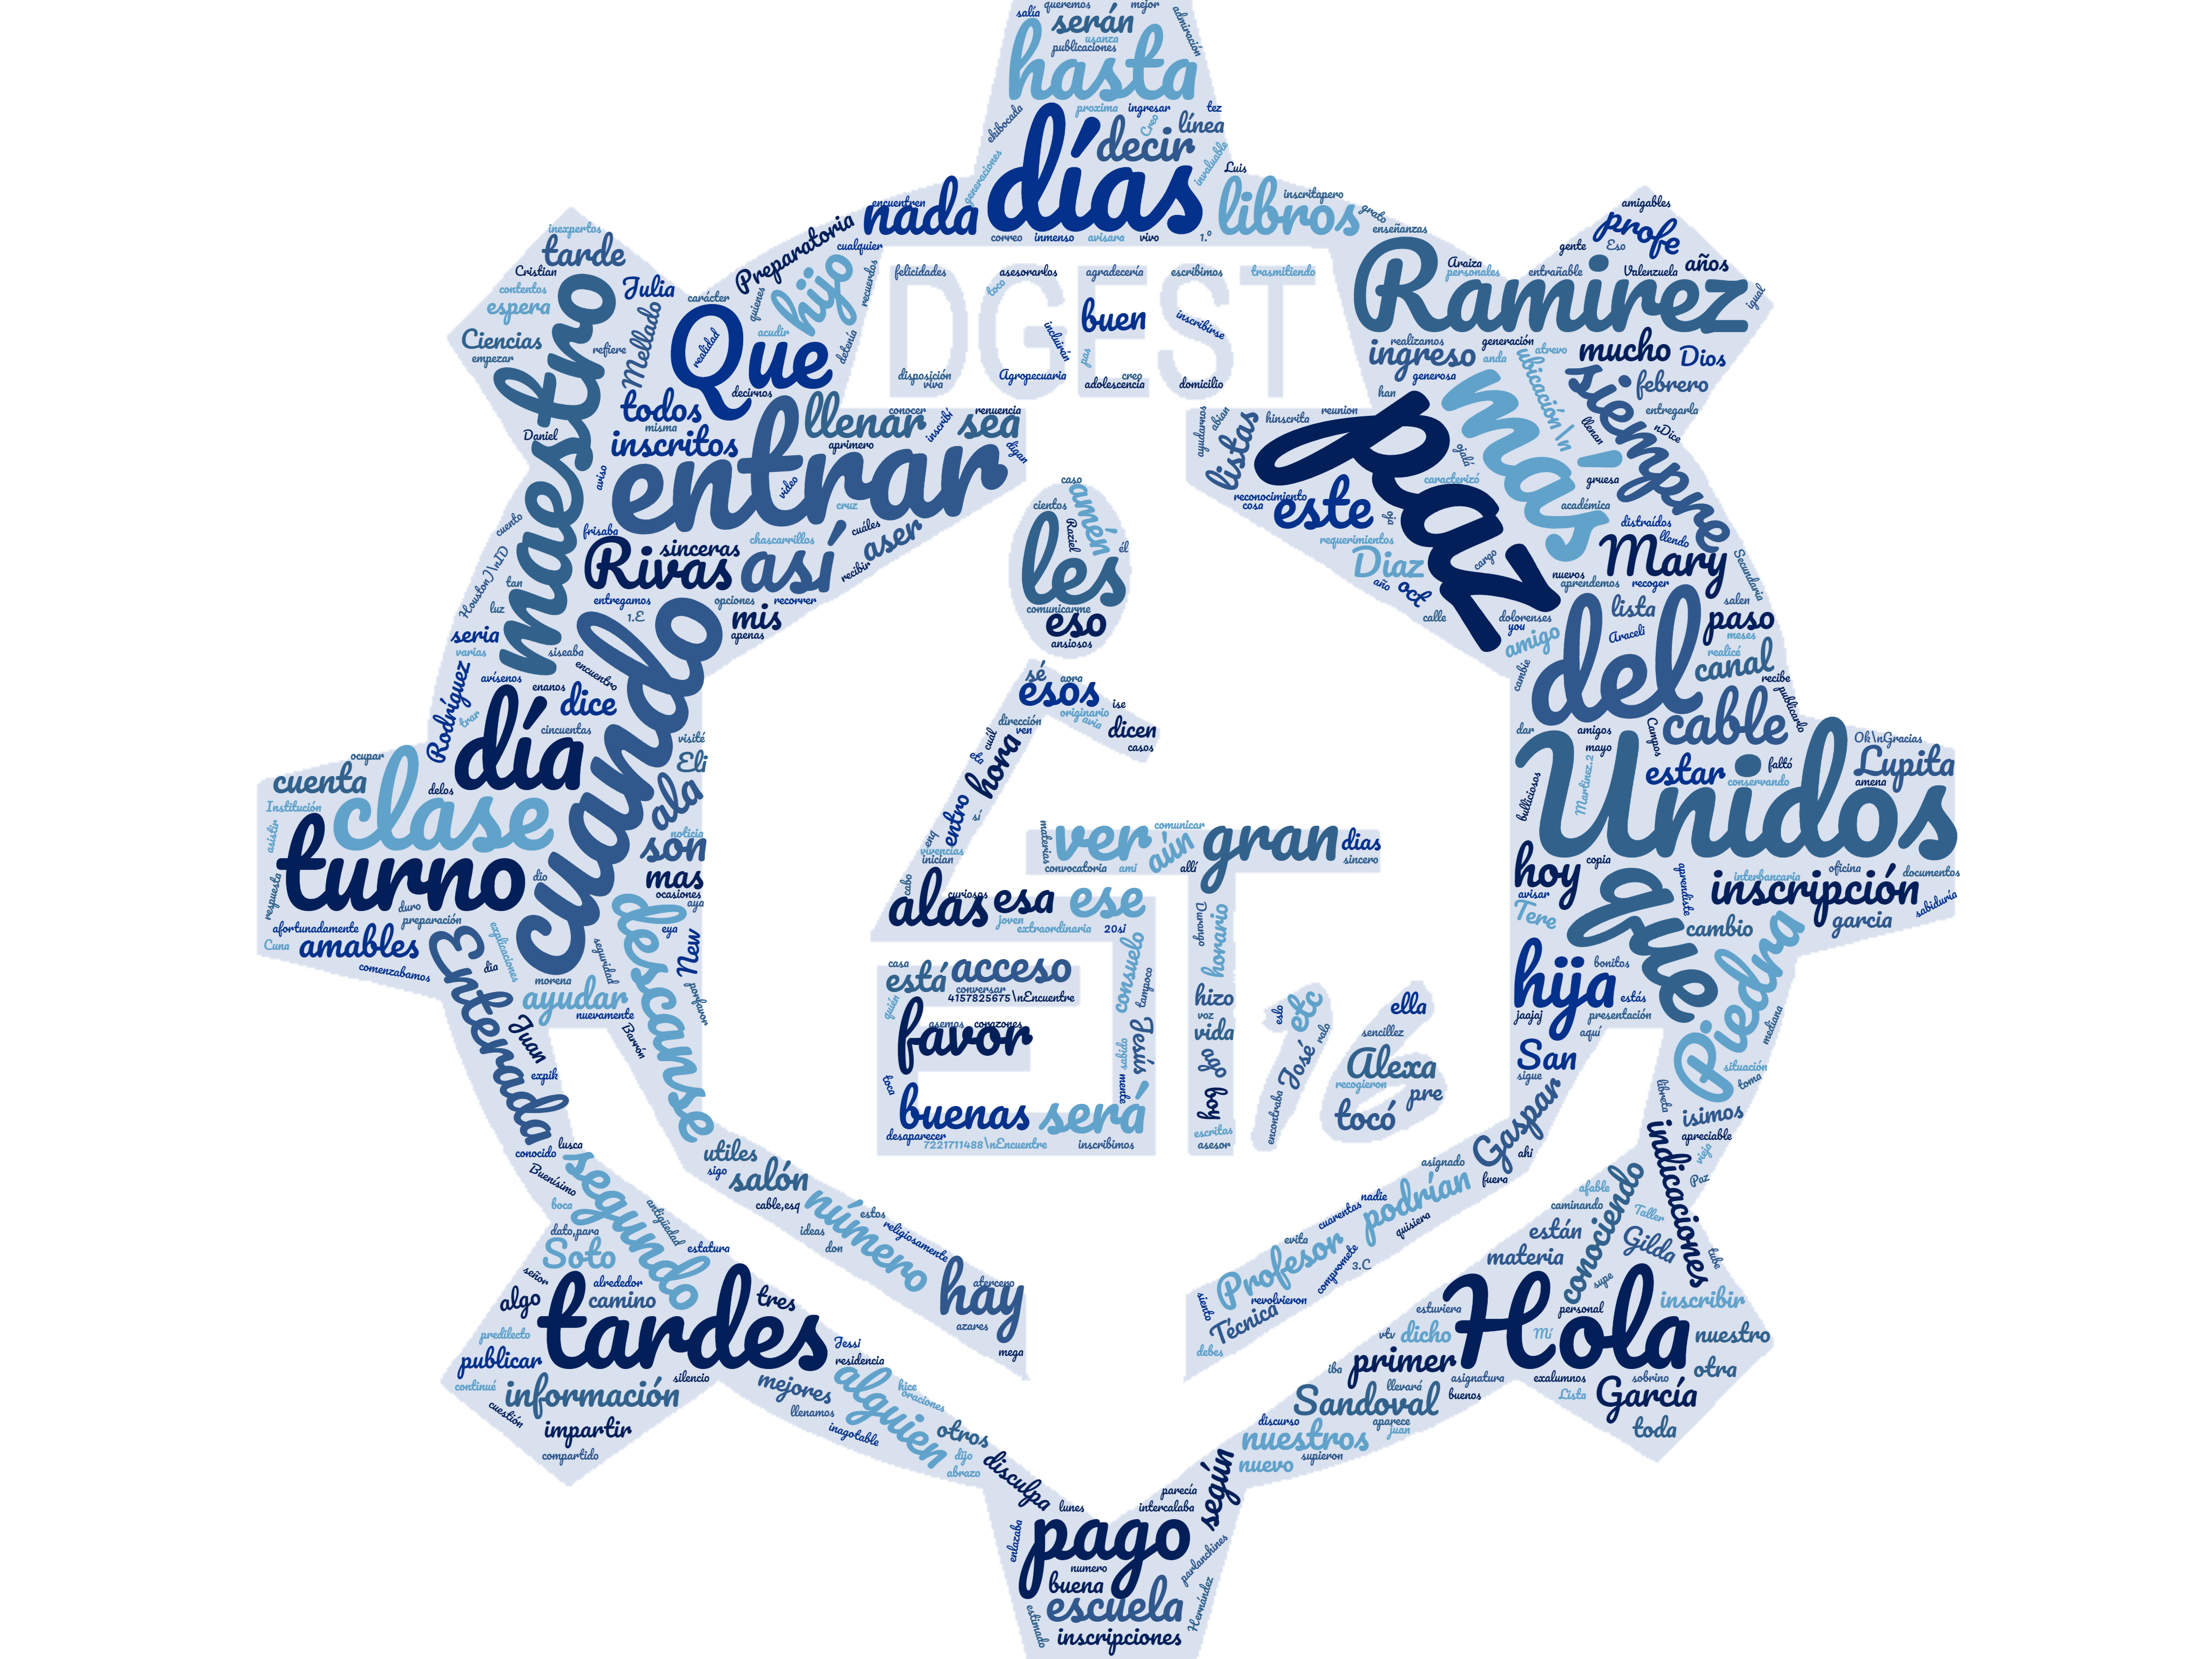

In [25]:
from PIL import Image 
  
# open method used to open different extension image file 
im = Image.open(r"../vectors/wordcloud.png")  
  
# This method will show image in any image viewer  
display(im)